Define the text


In [3]:
CLIC_file = '/home/nguyensolbadguy/Code_Directory/compression/datasets/CLIC2021/CLIC_image_list.txt'

train_file = '/home/nguyensolbadguy/Code_Directory/compression/datasets/CLIC2021/professional_train_2020/train'
test_file = '/home/nguyensolbadguy/Code_Directory/compression/datasets/CLIC2021/professional_test_2021'
validation_file = '/home/nguyensolbadguy/Code_Directory/compression/datasets/CLIC2021/professional_valid_2020/valid'

Read directory and save to CLIC_file

In [5]:
import os

image_file_name = []
file_dir = [train_file,validation_file,test_file]

for i in file_dir:
    for j in os.listdir(i):
        image_file_name.append(os.path.join(i,j))
        

print(image_file_name[0])
print(len(image_file_name))


with open(CLIC_file,'w') as f:
    for line in image_file_name:
        f.write(line + "\n")



/home/nguyensolbadguy/Code_Directory/compression/datasets/CLIC2021/professional_train_2020/train/alexander-rotker-107460.png
686


KODAK image 

In [7]:
image_file = '/home/nguyensolbadguy/Code_Directory/compression/datasets/Kodak/images'
KODAK_file = '/home/nguyensolbadguy/Code_Directory/compression/datasets/Kodak/KODAK_image_list.txt'

Read directory and save to KODAK


In [8]:
image_file_name = []

for j in os.listdir(image_file):
    image_file_name.append(os.path.join(image_file,j))
        

print(image_file_name[0])
print(len(image_file_name))


with open(KODAK_file,'w') as f:
    for line in image_file_name:
        f.write(line + "\n")


/home/nguyensolbadguy/Code_Directory/compression/datasets/Kodak/images/13.png
24


DIV2K image

In [9]:
train_image_file = '/home/nguyensolbadguy/Code_Directory/compression/datasets/DIV2K/archive/DIV2K_train_HR/DIV2K_train_HR'
test_image_file = '/home/nguyensolbadguy/Code_Directory/compression/datasets/DIV2K/archive/DIV2K_valid_HR/DIV2K_valid_HR'


DIV2K_file = '/home/nguyensolbadguy/Code_Directory/compression/datasets/DIV2K/DIV2K_image_list.txt'

Read image five and save path for DIV2K dataset

In [10]:

image_file_name = []
file_dir = [train_image_file,test_image_file]

for i in file_dir:
    for j in os.listdir(i):
        image_file_name.append(os.path.join(i,j))
        

print(image_file_name[0])
print(len(image_file_name))


with open(DIV2K_file,'w') as f:
    for line in image_file_name:
        f.write(line + "\n")



/home/nguyensolbadguy/Code_Directory/compression/datasets/DIV2K/archive/DIV2K_train_HR/DIV2K_train_HR/0280.png
900


COCO 2014

In [5]:
image_file_path = '/home/nguyensolbadguy/Code_Directory/compression/datasets/COCO2014/labels/val2014'
image_folder_path = '/home/nguyensolbadguy/Code_Directory/compression/datasets/COCO2014/val2014'
COCO2014_file = '/home/nguyensolbadguy/Code_Directory/compression/datasets/COCO2014/COCO2014_image_list.txt'

In [6]:
import os
image_file_name = []

for j in os.listdir(image_file_path):
    image_path = os.path.join(image_file_path,j)
    image_name,_ = os.path.splitext(os.path.basename(image_path))
    ann_path = os.path.join(image_folder_path, image_name + ".jpg")
    image_file_name.append(ann_path)
        

print(image_file_name[0])
print(len(image_file_name))


with open(COCO2014_file,'w') as f:
    for line in image_file_name:
        f.write(line + "\n")



/home/nguyensolbadguy/Code_Directory/compression/datasets/COCO2014/val2014/COCO_val2014_000000036460.jpg
40137


In [2]:
from pycocotools.coco import COCO
import json
import os

ann_file = '/home/nguyensolbadguy/Code_Directory/compression/datasets/COCO2014/annotations_trainval2014/annotations/instances_val2014.json'

annotationfile = '/home/nguyensolbadguy/Code_Directory/compression/datasets/COCO2014/validation_annotations.json'

coco = COCO(ann_file)

file_name_to_id = {img['file_name']: img['id'] for img in coco.dataset['images']}

with open('/home/nguyensolbadguy/Code_Directory/compression/datasets/COCO2014/COCO2014_image_list.txt', "r") as f:
    val_filenames = [line.strip() for line in f]
    
    
samples = []

for fname in val_filenames:
    filename = os.path.basename(fname)
    img_id = file_name_to_id.get(filename)
    if img_id is None:
        print(f"[WARNING] {fname} not found in COCO annotations.")
        continue

    ann_ids = coco.getAnnIds(imgIds=img_id, iscrowd=None)
    anns = coco.loadAnns(ann_ids)
    
    
    bboxes = []
    class_ids = []
    crowds = []
    difficults = []

    for ann in anns:
        x, y, w, h = ann['bbox']
        bbox = [x, y, x + w, y + h]  # Convert to [x1, y1, x2, y2]
        bboxes.append(bbox)
        class_ids.append(int(ann['category_id']))
        crowds.append(int(ann.get('iscrowd', 0)))
        difficults.append(int(ann.get('difficult', 0)))  # default 0
        

    sample_dict={
        'image_file': filename,
        'bbox':bboxes,
        'crowd':crowds,
        'difficult':difficults,
        'class_id':class_ids
    }
    samples.append(sample_dict)
        
        
with open(annotationfile,'w') as f:
    json.dump(samples, f)


loading annotations into memory...
Done (t=2.40s)
creating index...
index created!


Vimeo90K

In [5]:
train_file = '/home/nguyensolbadguy/Code_Directory/compression/datasets/vimeo90k/vimeo_triplet/tri_trainlist.txt'
validation_file = '/home/nguyensolbadguy/Code_Directory/compression/datasets/vimeo90k/vimeo_triplet/tri_testlist.txt'

VIMEO90K_train_file = '/home/nguyensolbadguy/Code_Directory/compression/datasets/vimeo90k/VIMEO90K_train_image_list.txt'
VIMEO90K_test_file = '/home/nguyensolbadguy/Code_Directory/compression/datasets/vimeo90k/VIMEO90K_validation_image_list.txt'
dataset_path = '/home/nguyensolbadguy/Code_Directory/compression/datasets/vimeo90k/vimeo_triplet/sequences/'

In [6]:
import os
image_file_name = []

with open(train_file,'r') as f:
    sub_folder_train = f.readlines()
    
sub_folder_train = [line.strip() for line in sub_folder_train]

with open(validation_file,'r') as f:
    sub_folder_validation = f.readlines()
    
sub_folder_validation = [line.strip() for line in sub_folder_validation]


print(sub_folder_train[0])
print(len(sub_folder_train))


with open(VIMEO90K_train_file,'w') as f:
    for line in sub_folder_train:
        f.write(dataset_path  +line + '/im1.png' + "\n")
        f.write(dataset_path  +line + '/im2.png' + "\n")
        f.write(dataset_path  +line + '/im3.png' + "\n")
        
with open(VIMEO90K_test_file,'w') as f:
    for line in sub_folder_validation:
        f.write(dataset_path  +line + '/im1.png' + "\n")
        f.write(dataset_path  +line + '/im2.png' + "\n")
        f.write(dataset_path  +line + '/im3.png' + "\n")
        
        



00001/0001
51313


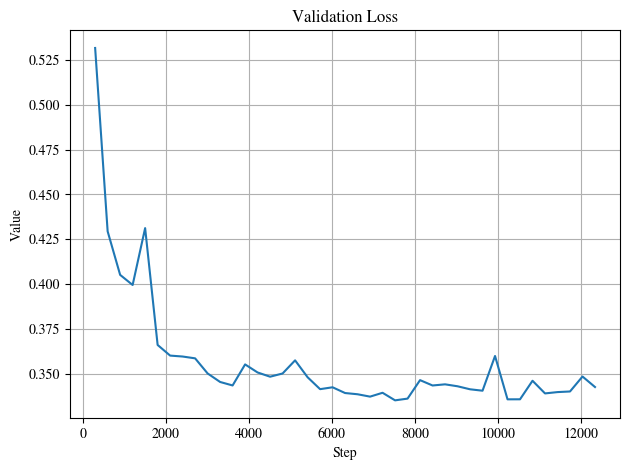

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman", "Times", "STIXGeneral", "DejaVu Serif"]
plt.rcParams["mathtext.fontset"] = "stix"   # math matches the serif look

# ---- Plot ----
df = pd.read_csv("val_loss.csv")   # expects columns: Step, Value
plt.figure()
plt.plot(df["Step"], df["Value"])
plt.xlabel("Step")
plt.ylabel("Value")
plt.title("Validation Loss")
plt.grid(True)
plt.tight_layout()
plt.show()

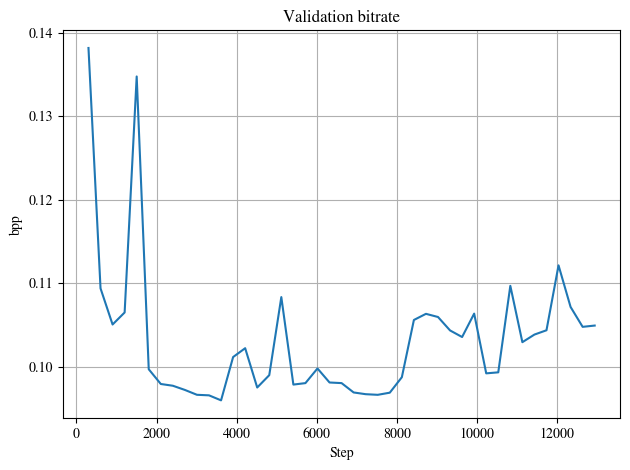

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman", "Times", "STIXGeneral", "DejaVu Serif"]
plt.rcParams["mathtext.fontset"] = "stix"   # math matches the serif look

# ---- Plot ----
df = pd.read_csv("bitrate.csv")   # expects columns: Step, Value
plt.figure()
plt.plot(df["Step"], df["Value"])
plt.xlabel("Step")
plt.ylabel("bpp")
plt.title("Validation bitrate")
plt.grid(True)
plt.tight_layout()
plt.show()

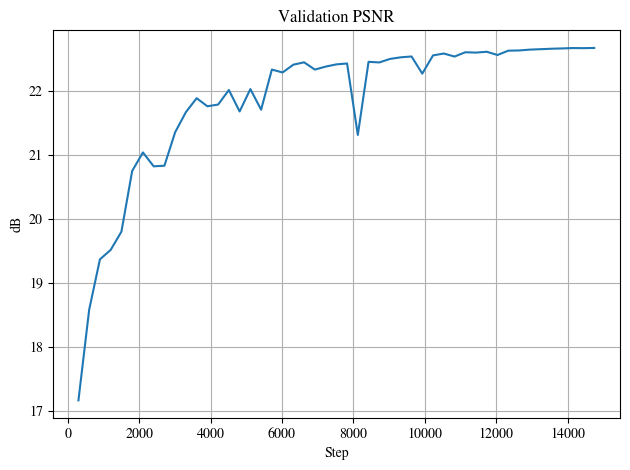

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman", "Times", "STIXGeneral", "DejaVu Serif"]
plt.rcParams["mathtext.fontset"] = "stix"   # math matches the serif look

# ---- Plot ----
df = pd.read_csv("psnr.csv")   # expects columns: Step, Value
plt.figure()
plt.plot(df["Step"], df["Value"])
plt.xlabel("Step")
plt.ylabel("dB")
plt.title("Validation PSNR")
plt.grid(True)
plt.tight_layout()
plt.show()